# Big Data for Public Policy

## Scraping the Internet to Collect Data

## [Elliott Ash, Malka Guillot, Philine Widmer]()

## [SICSS Zürich 2021](https://github.com/computational-social-science-zurich/sicss-zurich/)

## Outline
1. Introduction
2. HTML: scraping and parsing
3. Web APIs

**Learning objectives**
- Gathering (unstructured) web data and transforming it into structured data (“web scraping”).
- Accessing data on the web: APIs.

## Intro

### General interest references: 
-  Edelman, Benjamin. 2012. ["Using Internet Data for Economic Research."](https://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.26.2.189) Journal of Economic Perspectives, 26 (2): 189-206. 
-  Cavallo, Alberto, and Roberto Rigobon. 2016. ["The Billion Prices Project: Using Online Prices for Measurement and Research."](https://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.30.2.151) Journal of Economic Perspectives, 30 (2): 151-78. 

### Coding resources:
-[Python's requests & Beautiful Soup libraries](https://blog.hartleybrody.com/web-scraping-cheat-sheet/) (for web scraping & APIs)
- Ryan Mitchell, [Web Scraping with Python](https://learning.oreilly.com/library/view/web-scraping-with/9781491985564/), O'Reilly Media, 2018

### What is webscraping ?
<center>
<div class="r-stack"><img src="images/screenscraping.png" style="height: 400px;" > </div>
</center>

Source: [SICSS](https://compsocialscience.github.io) 

### What is Web Scraping?
- Process of **gathering information** from the Internet
    - structure or unstructured info
- Involves **automation** 

### Challenges of Web Scraping
- **Variety**. Every website is different.
- **Durability**. Websites constantly change.

### Points to keep in mind:
- It may or may not be legal
    - Loop at websites’ terms of service and robots.txt files
- Webscraping is tedious and frustrating

### Motivation

**Publication of crawling papers by year**

<center>
    
<div class="r-stack"><img src="images/publication_crawling_papers_by_year.png" style="height: 400px;" > </div>
</center>

*Source*: Claussen, Jörg and Peukert, Christian, **[Obtaining Data from the Internet: A Guide to Data Crawling in Management Research](https://ssrn.com/abstract=3403799)** (June 2019). 


### Example of data

- **Online markets**: housing, job, goods
- **Social media**: Twitter, Facebook, Wechat, newspaper text
- **Historical data** using the internet Archives

### Getting started: Things to consider before you begin
- Send an email to try to get the data directly
- Search if somebody has already faced the same or a similar problem.
- Does the site or service provide an API that you can access directly?
- Is the website only online for a limited time? Do you want an original snapshot as a backup? Is it more convenient to filter your data offline?
- Which `python package` is needed? 

### Most important python library for data collection##
- Standard: 
    - `Requests`
    - `Beautiful Soup`
- More advanced
    - `Scrapy` [documentation](https://docs.scrapy.org/en/latest/)
    - `Selenium`

$+$ installing the package:

In [1]:
pip install BeautifulSoup4

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Load packages

In [2]:
# Import packages + set options
from IPython.display import display
import json
import pandas as pd
pd.options.display.max_columns = None # Display all columns of a dataframe
pd.options.display.max_rows = 700
from pprint import pprint
import re

### Data communication for the World Wide Web 

- `HTTP protocol`= way of communication between the client (browser) and the web server 
    - no encryption $\rightarrow$ not safe
- `HTTPS protocol`= S for secured

$\Rightarrow $ works by doing `Requests` and `Responses`

### Static vs. dynamic websites 
![](https://about.gitlab.com/images/blogimages/ssg-gitlab-pages-series/part-1-dynamic-x-static-server.png)

Notes: 
- **Static Websites**: the server that hosts the site sends back HTML documents that already contain all the data you’ll get to see as a user.

### Request and Response

all interactions between a client and a web server are split into a request and a response:

- `Requests` contain relevant data regarding your request call:
    - base URL \[ More on this for API: the endpoint, the method used, the headers, and so on.\]
- `Responses` contain relevant data returned by the server:
    - the data or content, the status code, and the headers.

In [3]:
import requests
url='https://ballotpedia.org/List_of_current_members_of_the_U.S._Congress'
response = requests.get(url)

### `Request`'s attributes

In [4]:
request = response.request
print('request: ',request)
print('-----')
print('url: ',request.url)
print('-----')
print('path_url: ', request.path_url)
print('-----')
print('Method: ', request.method)
print('-----')
print('Method: ', request.headers)

request:  <PreparedRequest [GET]>
-----
url:  https://ballotpedia.org/List_of_current_members_of_the_U.S._Congress
-----
path_url:  /List_of_current_members_of_the_U.S._Congress
-----
Method:  GET
-----
Method:  {'User-Agent': 'python-requests/2.23.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


### `Response`'s attributes

- `.text` returns the response contents in Unicode format
- `.content` returns the response contents in bytes.

In [5]:
print('', response)
print('-----')
print('Text:', response.text[:50])
print('-----')
print('Status_code:', response.status_code)
print('-----')
print('hHeaders:', response.headers)

 <Response [200]>
-----
Text: <!DOCTYPE html>
<html class="client-nojs" lang="en
-----
Status_code: 200
-----
hHeaders: {'Accept-Ranges': 'bytes', 'Age': '0', 'Cache-Control': 's-maxage=900, must-revalidate, max-age=0', 'Content-Encoding': 'gzip', 'Content-language': 'en', 'Content-Type': 'text/html; charset=UTF-8', 'Date': 'Tue, 15 Jun 2021 07:20:39 GMT', 'Last-Modified': 'Tue, 15 Jun 2021 07:05:38 GMT', 'Link': '</wiki/skins/common/images/bplogo.png?e1b99>;rel=preload;as=image', 'Server': 'Apache', 'Vary': 'Accept-Encoding,Cookie', 'Via': '1.1 varnish', 'X-Cache': 'MISS', 'X-Cache-Expires': '', 'X-Cacheable': 'YES', 'X-Content-Type-Options': 'nosniff', 'X-UA-Compatible': 'IE=Edge', 'X-Varnish': '872016856', 'Content-Length': '42272', 'Connection': 'keep-alive'}


### Status Codes

**Important information**: 
if your request was successful, if it’s missing data, if it’s missing credentials

<center>    
<div class="r-stack"><img src="https://softcrony.com/blog/wp-content/uploads/2020/07/http-code.png" style="height: 400px;" > </div>
</center>

## Scraping & Parsing in Practice

### STEPS:
1. Inspect Your Data Source
1.  Scrape HTML Content From a Page
1.  Parse HTML Code With Beautiful Soup

## Step 1: Inspect Your Data Source

### Explore the Website 

**Objective**: understanding its underlying structure

We will scrape the list of current members of the U.S. Congress

### Website example for today


<center>
<div class="r-stack"><img src="images/ballotpedia.png" style="height: 400px;" > </div>
</center>

Source: [ballotpedia website](https://ballotpedia.org/List_of_current_members_of_the_U.S._Congress) 


### Understanding URLs
- **Base URL**: https://ballotpedia.org/List_of_current_members_of_the_U.S._Congress
- More complex URL with query parameter https://ballotpedia.org/wiki/index.php?search=jerry
    - query parameter=`p?search=jerry`
    - can be used to crawl websites if you have a list of queries that you want to loop over (e.g. dates, localities...)
    - query structure:
        - *Start*: `?`
        - *Information*: pieces of information constituting one query parameter are encoded in key-value pairs, where related keys and values are joined together by an equals sign (key=value). 
        - *Separator*: `&` -> if multiple query parameters 
        
Other example of URL: https://opendata.swiss/en/dataset?political_level=commune&q=health. 

<div class="alert alert-info">
<h3> Your turn</h3>
<p> Try to change the search and selection parameters and observe how that affects your URL. 
<p>   Next, try to change the values directly in your URL. See what happens when you paste the following URL into your browser’s address bar:
</div>

**Conclusion**: When you explore URLs, you can get information on how to retrieve data from the website’s server.

### Inspect the site: Using Developer Tools
We use the `inspect` function (right click) to access the underlying HTML interactively. 

<center>
<div class="r-stack"><img src="images/ballotpedia_inspect.png" style="height: 400px;" > </div>
</center>


### Developer tools
- Developer tools can help you understand the structure of a website
- I use it in firefox, but exists for most browsers
- Interactively explore the source html & the webpage

**`html` is great but intricated $\Rightarrow$ sublimed by `beautifulsoup`** 

##  Step 2: Scrape HTML Content From a Page

In [6]:
import requests
url='https://ballotpedia.org/List_of_current_members_of_the_U.S._Congress'
response = requests.get(url)
html=response.text
html[:500]

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of current members of the U.S. Congress - Ballotpedia</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_current_members_'

html looks messy.

Using the `prettify()` function from `BeautifulSoup` helps

In [7]:
# Parse raw HTML
from bs4 import BeautifulSoup # package for parsing HTML
soup = BeautifulSoup(html, 'html.parser') # parse html of web page
print(soup.prettify()[:1000])

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of current members of the U.S. Congress - Ballotpedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_current_members_of_the_U.S._Congress","wgTitle":"List of current members of the U.S. Congress","wgCurRevisionId":8246683,"wgRevisionId":8246683,"wgArticleId":180048,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Unique congress pages"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMont

##  Step 3: Parse HTML Code With Beautiful Soup

**Objectif**: extract url of senators from the webpage to build a list of url that will be used for scraping info on senators

### Find Elements by ID

In an HTML web page, every element can have an id attribute assigned. 

Can be used to directly access the element. 

In [8]:
balance=soup.find(id='Leadership_and_partisan_balance')
print(balance.prettify()[:500])

<span class="mw-headline" id="Leadership_and_partisan_balance">
 Leadership and partisan balance
</span>


<div class="alert alert-info">
<h3> Your turn</h3>
<p> Find the id & get the soup for the table entitled *List of current U.S. Senate members*. 
</div>

In [9]:
officeholder_table=soup.find(id='officeholder-table')
print(officeholder_table.prettify()[:500])

<table class="bptable gray sortable" id="officeholder-table" style="width:auto; border-bottom:1px solid #bcbcbc;">
 <thead>
  <tr colspan="4" style="background:#4c4c4c!important;color:#fff!important;text-align:center;padding: 7px 8px 8px;margin-bottom:4px;">
   <th>
    Office
   </th>
   <p>
    <br/>
   </p>
   <th>
    Name
   </th>
   <th>
    Party
   </th>
   <th>
    Date assumed office
   </th>
  </tr>
 </thead>
 <tr>
  <td style="padding-left:10px;">
   <a href="https://ballotpedia.org/


### Find Elements by HTML Class Name
Because the result is not unique `find_all` instead of `find`. 

Lets' rely on the html structure to find the row of the table

In [10]:
thead= officeholder_table.find('thead')
thead

<thead>
<tr colspan="4" style="background:#4c4c4c!important;color:#fff!important;text-align:center;padding: 7px 8px 8px;margin-bottom:4px;">
<th>Office</th>
<p><br/>
</p>
<th>Name</th>
<th>Party</th>
<th>Date assumed office</th>
</tr>
</thead>

In [11]:
rows=officeholder_table.find_all('tr')
len(rows) # consistent: 100 members + headline

101

### Let's try to get the `url` for one example row:

In [12]:
row=rows[1]
#row

In [13]:
tds=row.find_all('td')
tds[:4]

[<td style="padding-left:10px;"><a href="https://ballotpedia.org/List_of_United_States_Senators_from_Alabama">U.S. Senate Alabama</a></td>,
 <td style="padding-left:10px;text-align:center;"><a href="https://ballotpedia.org/Richard_Shelby">Richard Shelby</a></td>,
 <td class="partytd Republican">Republican </td>,
 <td style="text-align:center;">1987</td>]

In [14]:
url= tds[1].find_all('a')
print('a list:', url)
print('its unique element', url[0])
print('url wanted', url[0]['href'] )
print('Text content', url[0].get_text())

a list: [<a href="https://ballotpedia.org/Richard_Shelby">Richard Shelby</a>]
its unique element <a href="https://ballotpedia.org/Richard_Shelby">Richard Shelby</a>
url wanted https://ballotpedia.org/Richard_Shelby
Text content Richard Shelby


<div class="alert alert-info">
<h3> Your turn</h3>
<p> Use the code for 1 row in order to build a loop that gives a list of all of the wanted url. 
</div>

In [15]:
list_url=[]
for row in rows[1:]:
    tds=row.find_all('td')
    url= tds[1].find_all('a')[0]['href']    
    list_url.append(url)
list_url[:10]

['https://ballotpedia.org/Richard_Shelby',
 'https://ballotpedia.org/Tommy_Tuberville',
 'https://ballotpedia.org/Lisa_Murkowski',
 'https://ballotpedia.org/Daniel_S._Sullivan',
 'https://ballotpedia.org/Mark_Kelly',
 'https://ballotpedia.org/Kyrsten_Sinema',
 'https://ballotpedia.org/John_Boozman',
 'https://ballotpedia.org/Tom_Cotton',
 'https://ballotpedia.org/Dianne_Feinstein',
 'https://ballotpedia.org/Alex_Padilla']

## Your First Scraper

Then, the same logic can be implemented to get the info from the senators' page (e.g. https://ballotpedia.org/Jerry_Moran). The following code extracts info from the first 5 url from the list scraped above. 

In [16]:
from bs4 import NavigableString, Tag

# the dataframe in which we will put the scraper's output
df_parsed=pd.DataFrame()

for url in list_url[:10]:
    print('--------',url, '--------')
    #1. Get the soup
    response = requests.get(url)
    html=response.text
    soup = BeautifulSoup(html, 'html.parser') # parse html of web page
    
    dic_text_by_header=dict()
    #2. Extract info from the soup
    # get all the text content between 2 header (h2)
    for header in soup.find_all('h2')[0:len(soup.find_all('h2'))-1] :
        # print('--------',header.get_text())        
        nextNode=header
        # use the nextSibling method
        while True:
            nextNode=nextNode.nextSibling
            if nextNode is None:
                break
            if isinstance(nextNode, Tag):
                if nextNode.name == "h2":
                    break
                #print(nextNode.get_text(strip=True).strip())
                # The result is put in a dictionary as a value for key=corresponding header
                dic_text_by_header[header.get_text()]=[nextNode.get_text(strip=True).strip()]
                
    # put the dictionary into a dataframe
    temp=pd.DataFrame.from_dict(dic_text_by_header)

    # Concats the temporary dataframe with the global one
    df_parsed=pd.concat([temp, df_parsed])

-------- https://ballotpedia.org/Richard_Shelby --------
-------- https://ballotpedia.org/Tommy_Tuberville --------
-------- https://ballotpedia.org/Lisa_Murkowski --------
-------- https://ballotpedia.org/Daniel_S._Sullivan --------
-------- https://ballotpedia.org/Mark_Kelly --------
-------- https://ballotpedia.org/Kyrsten_Sinema --------
-------- https://ballotpedia.org/John_Boozman --------
-------- https://ballotpedia.org/Tom_Cotton --------
-------- https://ballotpedia.org/Dianne_Feinstein --------
-------- https://ballotpedia.org/Alex_Padilla --------


In [17]:
df_parsed.head()

,Biography,Elections,Campaign themes,Campaign donors,Noteworthy events,State legislative career,Notable endorsements,See also,External links,Footnotes,Career,U.S. Senate,Key votes,Analysis,Personal Gain Index,2016 Democratic National Convention,Committee assignments,Issues,Personal,Media,Top influencers by state,Ballot measure activity,Elections & appointments,Recent news
0,Alex Padilla earned a B.S. in mechanical engin...,,,"DonorAmountAT&T$14,300California Medical Assoc...",“I will not provide sensitive voter informatio...,,,,googletag.cmd.push(function() { googletag.disp...,(window.RLQ=window.RLQ||[]).push(function(){mw...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,,"""Accomplished"" - Feinstein campaign ad, releas...",,"On May 26, aides from Feinstein's office confi...",NaN,,United States SenateUnited States congressiona...,googletag.cmd.push(function() { googletag.disp...,(window.RLQ=window.RLQ||[]).push(function(){mw...,1992-Present: U.S. Senator from California1990...,Committee on Rules and Administration,"!function(d,s,id){var js,fjs=d.getElementsByTa...",The websiteLegistormcompiles staff salary info...,Dianne Feinstein Campaign ContributionsTotal R...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,He served as a clerk at the United States Cour...,"U.S. House, Arkansas District 4 Republican Pri...",Tom Cotton Campaign ContributionsTotal Raised$...,,NaN,NaN,NaN,,OfficeholderU.S. Senate ArkansasWebsiteFaceboo...,(window.RLQ=window.RLQ||[]).push(function(){mw...,2015-Present: U.S. Senator from Arkansas2013-2...,NaN,googletag.cmd.push(function() { googletag.disp...,Cotton voted with the Republican Party94.3 per...,The data used to calculate changes in net wort...,NaN,Committee on Intelligence (Select),The letter caused intense backlash from both t...,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,"U.S. Senate, Arkansas General Election, 2010Pa...",,,NaN,NaN,NaN,,OfficeholderU.S. Senate ArkansasWebsiteFaceboo...,(window.RLQ=window.RLQ||[]).push(function(){mw...,2011-Present: U.S. Senator from Arkansas2001-2...,NaN,googletag.cmd.push(function() { googletag.disp...,,John Boozman Campaign ContributionsTotal Raise...,NaN,Senate Committee on Veterans' Affairs,The letter caused backlash from both the Obama...,NaN,NaN,NaN,NaN,NaN,NaN
0,After receiving her master of social work and ...,"U.S. House, Arizona District 9 Republican Pri...","Excerpt: ""Health care has been the fastest gro...","Contributor2008 totalPublic Fund$31,060Yolanda...",NaN,NaN,NaN,"United States Senate election in Arizona, 2018...",PersonalTwitterInstagramLinkedIn,(window.RLQ=window.RLQ||[]).push(function(){mw...,2019-present: U.S. senator fromArizona2013-201...,NaN,googletag.cmd.push(function() { googletag.disp...,Sinema voted with the Democratic Party89.8 per...,Kyrsten Sinema Campaign ContributionsTotal Rai...,,"Government Reform Committee, Arizona SenateJud...",,Note: Pleasecontact usif the personal informat...,NaN,NaN,NaN,NaN,NaN


### Saving the `DataFrame` in a `pickle` format

<div class="alert alert-block alert-warning">
<i class="fa fa-warning"></i>&nbsp;<code>pickle</code> format
    <ul>
        <li> Useful to store <code>python</code> objects 
        </li>
        <li> Well integrated in  <code>pandas</code> (using <code>to_pickle</code> and <code>read_pickle</code>)
        </li>
        <li> When the object is not a pandas Dataframe, use the <code>pickle</code> package
        </li>
    </ul>
</div>


<div class="alert alert-block alert-warning">
<i class="fa fa-warning"></i>&nbsp;<code>os</code> package
    <ul>
        <li> <code>os.getcwd()</code>: fetchs the current path
        </li>
        <li> <code>os.path.dirname()</code>: go back to the parent directory
        </li>
        <li> <code>os.path.join()</code>: concatenates several paths
        </li>
    </ul>
</div>

In [19]:
import os
parent_path=os.path.dirname(os.getcwd()) # os.getcwd() fetchs the current path, 
data_path=os.path.join(parent_path, 'data') 
df_parsed.to_pickle(os.path.join(data_path, 'df_senators.pickle'))

### Going further

There are also **dynamic websites**: the server does not always send back HTML, but your browser also receive and interpret JavaScript code that you cannot retreive from the HTML. You receive JavaScript code that you cannot parse using `beautiful soup` but that you would need to execute like a browser does. 

Solutions: 
- Use `requests-html` 
- Simulate a browser using [selenium](https://selenium-python.readthedocs.io/) 

# Application Programming Interfaces (API)

### What is an API?

Communication layer that allows different systems to talk to each other without having to understand exactly what each other does.

$\Rightarrow$ provide a to **progammable** access to data.

The website [Programmable Web](https://www.programmableweb.com/apis/directory) lists more than 225,353 API from sites as diverse as Google, Amazon, YouTube, the New York Times, del.icio.us, LinkedIn, and many others.

<center>
<div class="r-stack"><img src="https://www.programmableweb.com/sites/default/files/2019-06-total-apis-since-2005.png" style="height: 400px;" > </div>
</center>

Source: [Programmable Web](https://www.programmableweb.com/news/apis-show-faster-growth-rate-2019-previous-years/research/2019/07/17) 


### How Does an API Work?

- Relying on **HTTP messages** :
    - `request` for information or data, 
    - the API returns a `response` with what you requested
- Similar to visiting a website: you specify a URL and information is sent to your machine.

###  Better than webscraping if possible because: 
- More stable than webpages
- No HTML but already structured data (e.g. in `json`)
- we focus on the APIs that use HTTP protocol

<center>
<img src="https://s3.us-west-1.wasabisys.com/idbwmedia.com/images/api/restapi_restapi.svg">
</center>

### HTTP Methods
| HTTP Method | Description                  | Requests method   |
|-------------|------------------------------|-------------------|
| POST        | Create a new resource.       | requests.post()   |
| GET         | Read an existing resource.   | requests.get()    |
| PUT         | Update an existing resource. | requests.put()    |
| DELETE      | Delete an existing resource. | requests.delete() |

## Calling Your First API Using Python

Forecasts from the [**Carbon Intensity API**](https://carbonintensity.org.uk/) (include CO2 emissions related to eletricity generation only).

See the API [documentation](https://carbon-intensity.github.io/api-definitions/#carbon-intensity-api-v2-0-0)

<center>
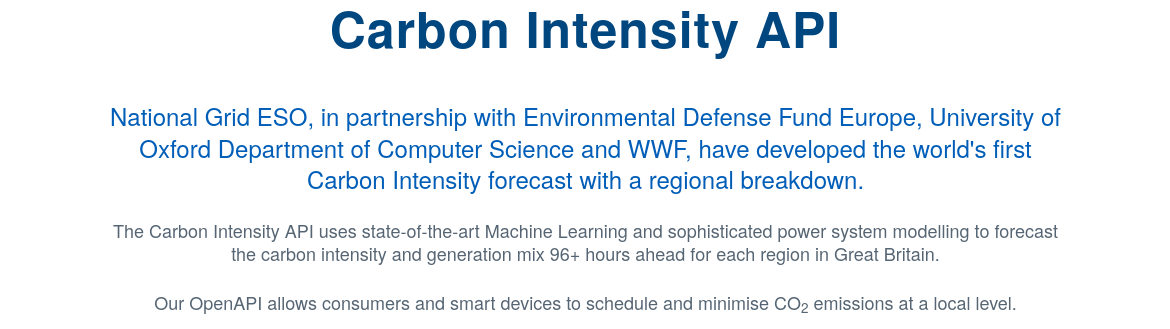
</center>


In [20]:
import requests
headers = { 
  'Accept': 'application/json'
}
# fetch (or get) data from the URL
requests.get('https://api.carbonintensity.org.uk', params={}, headers = headers) 

<Response [200]>

In [21]:
response = requests.get('https://api.carbonintensity.org.uk', params={}, headers = headers) 
print(response.text[:500])

<!DOCTYPE html>
<html lang="en">
  <head>
    <title>Carbon Intensity API</title>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css">
    <script src="https://ajax.googleapis.com/ajax/libs/jquery/3.2.1/jquery.min.js"></script>
    <script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/js/bootstrap.min.js"></script>
    <style>
  


### Endpoints and Resources
- **base URL**: https://api.carbonintensity.org.uk
    - Other examples: https://api.twitter.com; https://api.github.com
    - very basic information about an API, not the real data.
- Extend the url with **endpoint**
    - = a part of the URL that specifies what resource you want to fetch
    - check the [documentation](https://carbon-intensity.github.io/api-definitions/#carbon-intensity-api-v2-0-0)
 to learn more about what endpoints are available

### Using the `intensity`  endpoint:

In [22]:
# Get Carbon Intensity data for current half hour
r = requests.get('https://api.carbonintensity.org.uk/intensity', params={}, headers = headers)

# Different outputs:
print("--- text ---")
pprint(r.text)
print("--- Content ---")
pprint(r.content)
print("--- JSON---")
pprint(r.json())

--- text ---
('{ \r\n'
 '  "data":[{ \r\n'
 '    "from": "2021-06-15T06:30Z",\r\n'
 '    "to": "2021-06-15T07:00Z",\r\n'
 '    "intensity": {\r\n'
 '      "forecast": 200,\r\n'
 '      "actual": 199,\r\n'
 '      "index": "moderate"\r\n'
 '    }\r\n'
 '  }]\r\n'
 '}')
--- Content ---
(b'{ \r\n  "data":[{ \r\n    "from": "2021-06-15T06:30Z",\r\n    "to": "2021-'
 b'06-15T07:00Z",\r\n    "intensity": {\r\n      "forecast": 200,\r\n      "a'
 b'ctual": 199,\r\n      "index": "moderate"\r\n    }\r\n  }]\r\n}')
--- JSON---
{'data': [{'from': '2021-06-15T06:30Z',
           'intensity': {'actual': 199, 'forecast': 200, 'index': 'moderate'},
           'to': '2021-06-15T07:00Z'}]}


<div class="alert alert-block alert-warning">
<h2><i class="fa fa-warning"></i><code>json</code> </h2>
    <ul>
        <li><code>json</code>= python dictionary
        </li>
        <li>A great format for structured data
        </li>
    </ul>
</div>

In [23]:
# json objects work as do any other dictionary in Python
json=r.json()
json['data']

[{'from': '2021-06-15T06:30Z',
  'to': '2021-06-15T07:00Z',
  'intensity': {'forecast': 200, 'actual': 199, 'index': 'moderate'}}]

In [24]:
# get the actual intensity value:
json['data'][0]['intensity']['actual']

199

<div class="alert alert-info">
<h3> Your turn</h3>
        <li>Get Carbon Intensity factors for each fuel type
        </li>
        <li> Get Carbon Intensity data for current half hour for GB regions
        </li>
    </ul>

</div>

In [25]:
r = requests.get('https://api.carbonintensity.org.uk/intensity/factors', params={}, headers = headers)
pprint(r.json())

{'data': [{'Biomass': 120,
           'Coal': 937,
           'Dutch Imports': 474,
           'French Imports': 53,
           'Gas (Combined Cycle)': 394,
           'Gas (Open Cycle)': 651,
           'Hydro': 0,
           'Irish Imports': 458,
           'Nuclear': 0,
           'Oil': 935,
           'Other': 300,
           'Pumped Storage': 0,
           'Solar': 0,
           'Wind': 0}]}


In [26]:
# Get Carbon Intensity data for current half hour for GB regions
r = requests.get('https://api.carbonintensity.org.uk/regional', params={}, headers = headers)
#pprint(r.json())

### Query Parameters
- cf. slide on `url`
- used as filters you can send with your API request to further narrow down the responses.

In [27]:
# In the carbonintensity API, it works differently:
from_="2018-08-25T12:35Z"
to="2018-08-25T13:35Z"
r = requests.get('https://api.carbonintensity.org.uk/regional/intensity/{}/{}'.format(from_, to), params={}, headers = headers)
#pprint(r.json())

## API Limitations
To prevent collection of huge amount of individual data, many APIs require you to obtain “credentials” or codes/passwords that identify you and determine which types of data you are allowed to access. 

### API Credentials
- Different methods/level of authentification exist
    - API keys
    - OAuth
      
###  Rate Limiting
- The credentials also define how often we are allowed to make requests for data. 
- Be careful not to exceed the limits set by the API developers. 

### API Keys

- Most common level of authentication 
- These keys are used to identify you as an API user or customer and to trace your use of the API. 
- API keys are typically sent as a request header or as a query parameter.


### Example of API key authentification using the nasa API!!!

In [28]:
endpoint = "https://api.nasa.gov/mars-photos/api/v1/rovers/perseverance/photos"
# Replace DEMO_KEY below with your own key if you generated one.
api_key = "DEMO_KEY"
# You can add the API key to your request by appending the api_key= query parameter:
query_params = {"api_key": api_key, "earth_date": "2021-02-27"}
response = requests.get(endpoint, params=query_params)
response

<Response [200]>

Authentification was a success!

In [29]:
response.json()
photos = response.json()["photos"]
print(f"Found {len(photos)} photos")
photos[50]["img_src"]

Found 239 photos


'https://mars.nasa.gov/mars2020-raw-images/pub/ods/surface/sol/00009/ids/edr/browse/ncam/NLE_0009_0667755063_497ECM_N0030000NCAM00102_02_0LLJ01_1200.jpg'

<center>
<img src="https://mars.nasa.gov/mars2020-raw-images/pub/ods/surface/sol/00009/ids/edr/browse/ncam/NRF_0009_0667756352_693ECM_N0030000NCAM05000_01_295J01_1200.jpg">
</center>

### More from Perseverance!

[List](https://github.com/chrisccerami/mars-photo-api#cameras) of the different camera of perseverance. 

[Web application](https://mars-photos.herokuapp.com/)

# Going further: simulated browser

##  Sometimes, simple scraping is not working

Methods for **dynamic web pages** where elements may change without the page itself being reloaded

A more extensive tutorial: 
https://realpython.com/modern-web-automation-with-python-and-selenium/


## Setting up 

### Package (anaconda users)
` conda install -c conda-forge selenium `

### Installation 
- Which version of chrome/chromium do you have? 
    - Me: Version 91.0.4472.77
    - Download the corresponding chromedriver [here](https://sites.google.com/chromium.org/driver/downloads?authuser=0)
    - You can use the path the the chromedriver file
    
Installation guidelines: https://selenium-python.readthedocs.io/installation.html#

*Caveat*: the installation can be cumbersome...

## Simple example

In [30]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
url="http://www.python.org"

### Starting a browser

In [36]:
options = Options()
#options.add_argument('headless')
options.add_argument('--disable-infobars')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('--no-sandbox')
options.add_argument('--remote-debugging-port=9222')
driver = webdriver.Chrome( chrome_options=options)  # Optional argument, if not specified will search path.
driver.get(url)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: use options instead of chrome_options
  import sys


### Navigating a browser

In [32]:
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys

search_form = driver.find_element_by_id('id-search-field') # go to an element 
search_form.send_keys('real python') # fill in a form
driver.find_element_by_id('submit').click() # clcik a button

### You can also:

- use `xpath` instead of `id` to find an element (`driver.find_element_by_xpath`)
- get the text of the element

In [37]:
driver.find_element_by_xpath('/html/body/div/div[3]/div/section/div[1]/div[1]/p[1]').text

"Whether you're new to programming or an experienced developer, it's easy to learn and use Python."

In [38]:
driver.close()

## General remarks
- Start simple and expand your program incrementally.
- Keep it simple. Do not overengineer the problem.
- Do not repeat yourself. Code duplication implies bug reuse.
- Limit the number of iterations for test runs. Use print statements toinspect objects.
- Write tests to verify things work as intended.
- If the web page cannot be navigated easily or has hidden javascript, look into Selenium.
- If you scraper requires complex monitoring/validation procedures orthreading for performance, look into Python.